In [2]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# load the dataset and show first 10 records
data_set = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ML/data/banking.csv')
data_set.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [5]:
# describe summary
data_set.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
data_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
data_set.shape

(41188, 21)

# Preprocessing.


Handling Missing Values

In [8]:
data_set.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

Handling duplicate values

In [9]:
data_set.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [10]:
data_set=data_set.drop_duplicates()
data_set=data_set.reset_index(drop=True)

# **Dropping** duration columns

In [11]:
data_set=data_set.drop(columns='duration',axis=1)
data_set=data_set.reset_index(drop=True)

Dividing Dataset into 2 base on numerical and categorical columns

In [12]:
features=pd.DataFrame(data_set)

In [13]:
# extract numerical columns from the dataset
num_df = features.select_dtypes(include=np.number)
# get the information about numerical columns
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   campaign        41176 non-null  int64  
 2   pdays           41176 non-null  int64  
 3   previous        41176 non-null  int64  
 4   emp_var_rate    41176 non-null  float64
 5   cons_price_idx  41176 non-null  float64
 6   cons_conf_idx   41176 non-null  float64
 7   euribor3m       41176 non-null  float64
 8   nr_employed     41176 non-null  float64
 9   y               41176 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [14]:
num_df.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Handling Outliers 

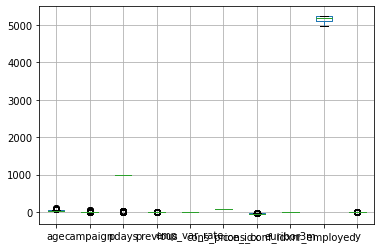

In [15]:
num_df.boxplot()

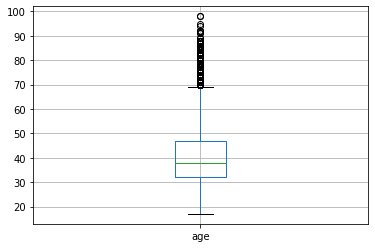

In [16]:
num_df.boxplot(column='age')

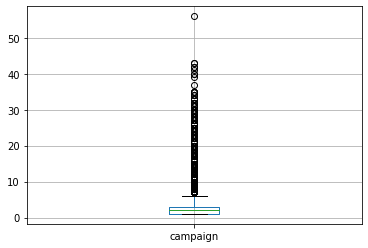

In [17]:
num_df.boxplot(column='campaign')

In [18]:
df1=num_df.drop(num_df[num_df['campaign'] > 50].index)
df1.shape

(41175, 10)

In [19]:
num_df=df1;
num_df=num_df.reset_index(drop=True)

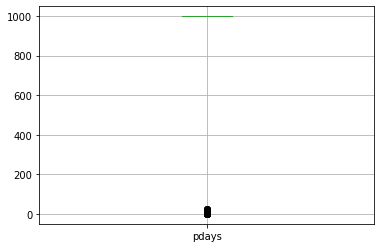

In [20]:
num_df.boxplot(column='pdays')

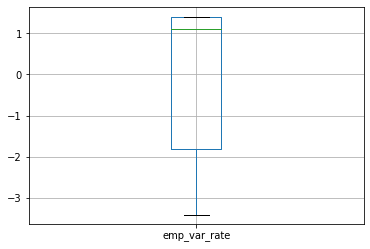

In [21]:
num_df.boxplot(column='emp_var_rate')

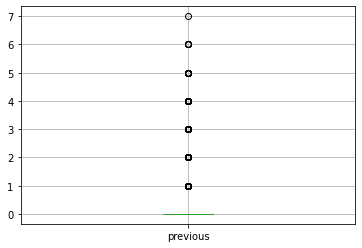

In [22]:
num_df.boxplot(column='previous')

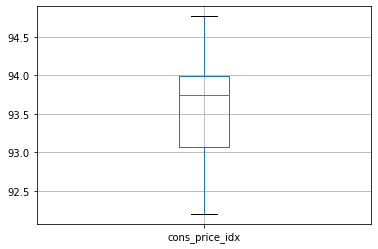

In [23]:
num_df.boxplot(column='cons_price_idx')

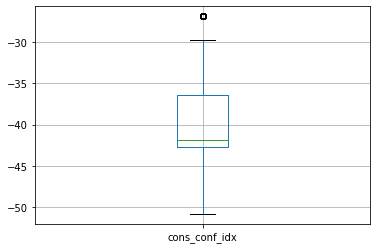

In [24]:
num_df.boxplot(column='cons_conf_idx')

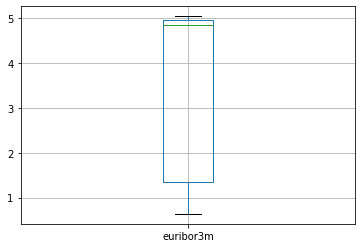

In [25]:
num_df.boxplot(column='euribor3m')

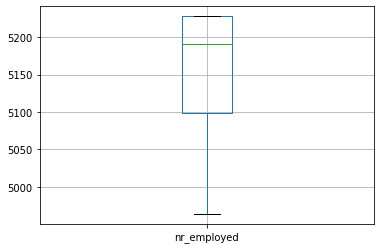

In [26]:
num_df.boxplot(column='nr_employed')

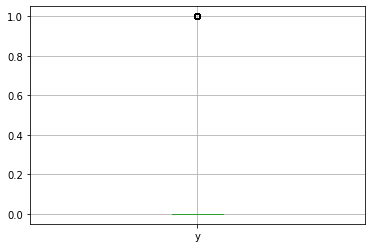

In [27]:
num_df.boxplot(column='y')

Adding y column to a Target data frame

In [28]:
target=pd.DataFrame(num_df,columns=['y'])

In [29]:
num_df = num_df.drop('y', axis=1)
num_df=num_df.reset_index(drop=True)

In [30]:
num_df['age'].shape

(41175,)

Producing Q-Q Plots and Histograms of the features

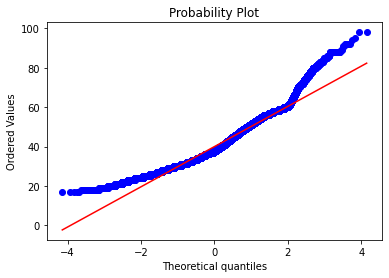

In [31]:
stats.probplot(num_df["age"], dist="norm", plot=plt)
plt.show()

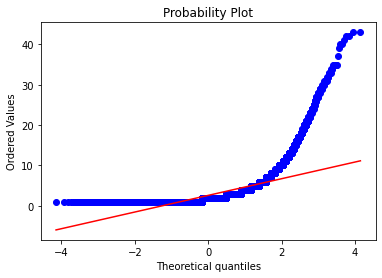

In [32]:
stats.probplot(num_df["campaign"], dist="norm", plot=plt)
plt.show()

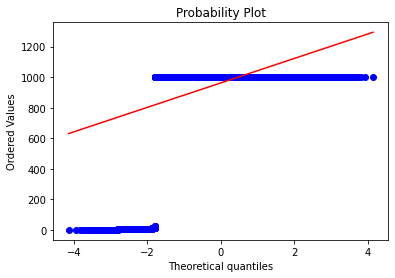

In [33]:
stats.probplot(num_df["pdays"], dist="norm", plot=plt)
plt.show()

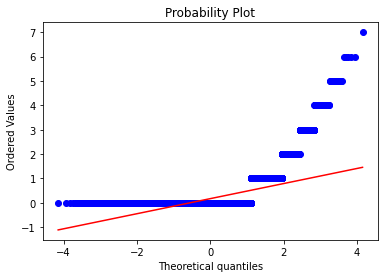

In [34]:
stats.probplot(num_df["previous"], dist="norm", plot=plt)
plt.show()

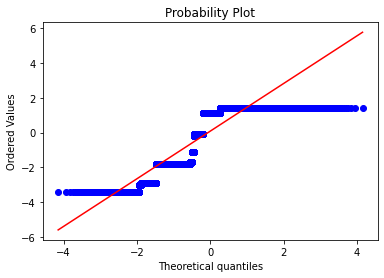

In [35]:
stats.probplot(num_df["emp_var_rate"], dist="norm", plot=plt)
plt.show()


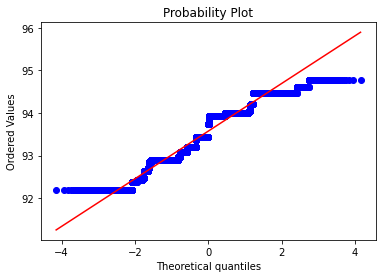

In [36]:
stats.probplot(num_df["cons_price_idx"], dist="norm", plot=plt)
plt.show()

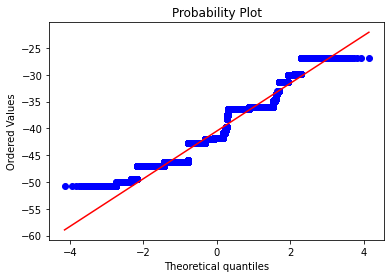

In [37]:
stats.probplot(num_df["cons_conf_idx"], dist="norm", plot=plt)
plt.show()

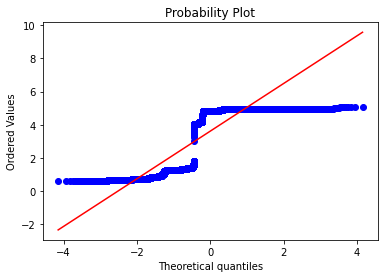

In [38]:
stats.probplot(num_df["euribor3m"], dist="norm", plot=plt)
plt.show()

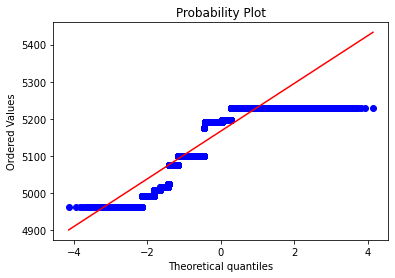

In [39]:
stats.probplot(num_df["nr_employed"], dist="norm", plot=plt)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef7493450>,
      dtype=object)

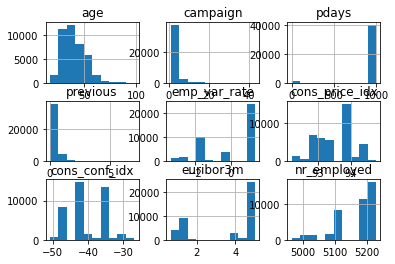

In [40]:
num_df.hist()

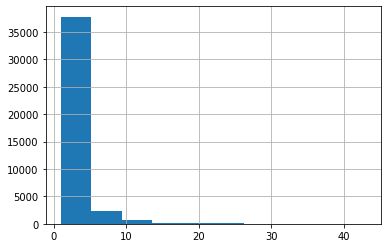

In [41]:
num_df['campaign'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef708c090>]],
      dtype=object)

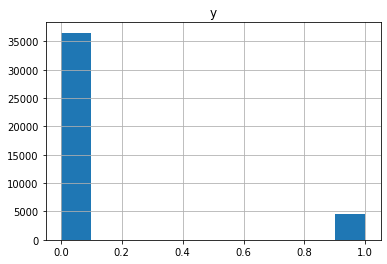

In [42]:
y_true=target.copy()
y_true.hist()

Data Transformation

In [43]:
# transformations for right skewed features
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

columns = ['age', 'campaign', 'previous']

data = sqrt_transformer.transform(num_df[columns])

num_df[columns]=data

In [44]:
# do the transformations for left skewed features
squared_transformer = FunctionTransformer(lambda x: x**2, validate=True)

columns = ['nr_employed']

data = squared_transformer.transform(num_df[columns])

num_df[columns]=data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef6fbcf50>,
      dtype=object)

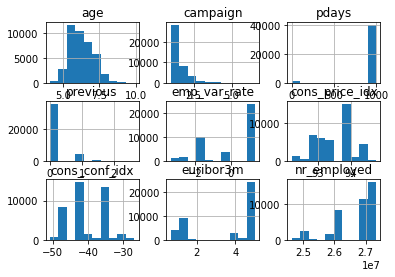

In [45]:
num_df.hist()

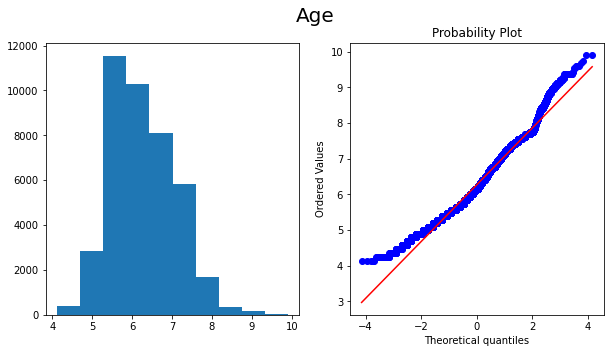

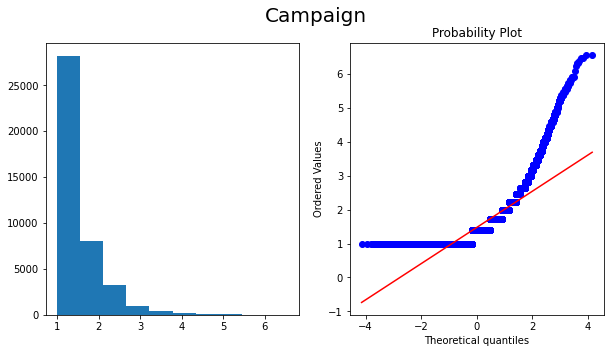

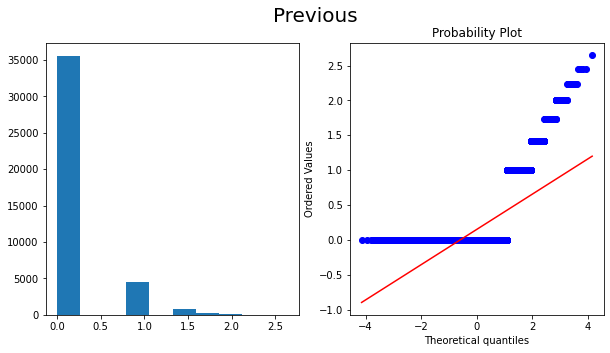

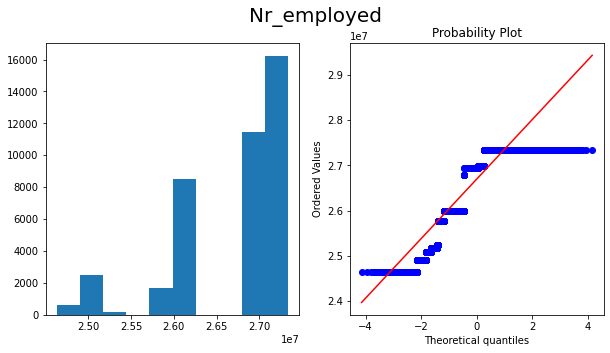

In [46]:
columns = ['age', 'campaign', 'previous','nr_employed']

# code to get the histograms and Q-Q plots after applying transformations
for index, col in enumerate(columns):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='black')
    axes[0].hist(num_df[col])
    stats.probplot(num_df[col], dist="norm", plot=axes[1])
    plt.show()

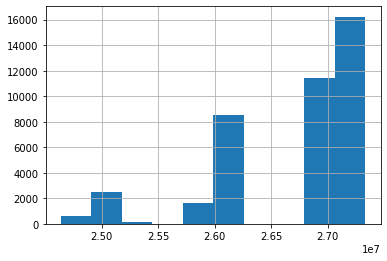

In [47]:
num_df['nr_employed'].hist()

Label Encoding

In [48]:
#getting categorical columns separately 
categorical_df = data_set.select_dtypes(exclude=np.number)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   poutcome     41176 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [49]:
categorical_df.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [50]:
categorical_df['job']=categorical_df['job'].astype('category').cat.codes
categorical_df['marital']=categorical_df['marital'].astype('category').cat.codes
categorical_df['education']=categorical_df['education'].astype('category').cat.codes
categorical_df['default']=categorical_df['default'].astype('category').cat.codes
categorical_df['housing']=categorical_df['housing'].astype('category').cat.codes
categorical_df['loan']=categorical_df['loan'].astype('category').cat.codes
categorical_df['contact']=categorical_df['contact'].astype('category').cat.codes
categorical_df['month']=categorical_df['month'].astype('category').cat.codes
categorical_df['day_of_week']=categorical_df['day_of_week'].astype('category').cat.codes
categorical_df['poutcome']=categorical_df['poutcome'].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [51]:
categorical_df.isnull().any()

job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
poutcome       False
dtype: bool

In [52]:
categorical_df.isnull().any()

job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
poutcome       False
dtype: bool

In [53]:
num_df.isnull().any()

age               False
campaign          False
pdays             False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
dtype: bool

 Final datadframe to join numerical data columns with categorical data columns

In [54]:
# final datadframe to join numerical data columns with categorical data columns
final_df = num_df.join(categorical_df)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  float64
 1   campaign        41175 non-null  float64
 2   pdays           41175 non-null  int64  
 3   previous        41175 non-null  float64
 4   emp_var_rate    41175 non-null  float64
 5   cons_price_idx  41175 non-null  float64
 6   cons_conf_idx   41175 non-null  float64
 7   euribor3m       41175 non-null  float64
 8   nr_employed     41175 non-null  float64
 9   job             41175 non-null  int8   
 10  marital         41175 non-null  int8   
 11  education       41175 non-null  int8   
 12  default         41175 non-null  int8   
 13  housing         41175 non-null  int8   
 14  loan            41175 non-null  int8   
 15  contact         41175 non-null  int8   
 16  month           41175 non-null  int8   
 17  day_of_week     41175 non-null 

In [55]:
final_df.isnull().values.any()

False

In [56]:
y_true.value_counts()

y
0    36536
1     4639
dtype: int64

Standardization

In [57]:
columnfeatures=['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed' ]
scaler = StandardScaler()
scaler.fit(final_df[columnfeatures])

final_df[columnfeatures]= scaler.transform(final_df[columnfeatures])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef6b8d190>,
      dtype=object)

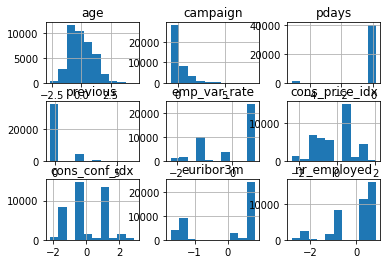

In [58]:
final_df[columnfeatures].hist()

In [59]:
final_df.isnull().values.any()

False

In [60]:
final_df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.445094,-0.777914,0.195446,-0.388096,0.839089,-0.227543,0.951413,0.773591,0.849370,1,1,0,1,2,0,0,1,2,1
1,1.248893,-0.777914,0.195446,-0.388096,-0.115793,-0.649079,-0.323487,0.230472,0.395127,9,1,7,0,0,0,0,7,0,1
2,-1.222184,0.410968,-5.116504,3.258902,-1.134334,0.828025,0.151900,-1.667562,-2.411437,4,2,6,0,2,0,0,4,2,2
3,-0.037355,-0.105214,0.195446,-0.388096,-1.197993,-0.865030,-1.425519,-1.277808,-0.947961,7,1,3,0,0,0,0,0,0,1
4,1.417999,-0.777914,-5.132552,2.190721,-1.898240,-2.374958,1.967011,-1.586844,-1.262329,5,1,0,0,2,0,0,1,0,2


# Feature Engineering

Identifing significance of the features

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.005127,-0.022693,0.009771,0.018136,0.009690,0.125121,0.030102,0.004690,0.016245
campaign,0.005127,1.000000,0.058675,-0.093991,0.160024,0.130872,-0.015750,0.141810,0.153066,-0.071138
pdays,-0.022693,0.058675,1.000000,-0.552779,0.271061,0.078917,-0.091379,0.296945,0.371042,-0.324947
previous,0.009771,-0.093991,-0.552779,1.000000,-0.464156,-0.267540,-0.078784,-0.488842,-0.512821,0.217486
emp_var_rate,0.018136,0.160024,0.271061,-0.464156,1.000000,0.775291,0.196246,0.972244,0.908811,-0.298285
cons_price_idx,0.009690,0.130872,0.078917,-0.267540,0.775291,1.000000,0.059156,0.688176,0.525197,-0.136129
cons_conf_idx,0.125121,-0.015750,-0.091379,-0.078784,0.196246,0.059156,1.000000,0.277853,0.102507,0.054810
euribor3m,0.030102,0.141810,0.296945,-0.488842,0.972244,0.688176,0.277853,1.000000,0.946382,-0.307737
nr_employed,0.004690,0.153066,0.371042,-0.512821,0.908811,0.525197,0.102507,0.946382,1.000000,-0.353604
y,0.016245,-0.071138,-0.324947,0.217486,-0.298285,-0.136129,0.054810,-0.307737,-0.353604,1.000000


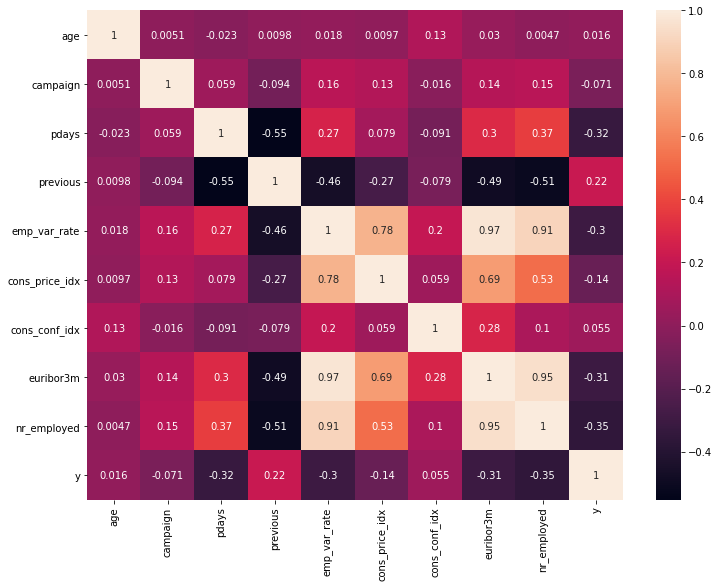

In [61]:
import seaborn as sns
# correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
correlation_matrix = pd.concat([final_df.iloc[:,:9], y_true], axis=1).corr()
sns.heatmap(correlation_matrix,annot=True)
correlation_matrix

In [62]:
final_df.isnull().any()

age               False
campaign          False
pdays             False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
poutcome          False
dtype: bool

PCA

In [63]:
pca = PCA()

final_Scaled_pca = pca.fit_transform(final_df) 


In [64]:
pca.explained_variance_ratio_

array([3.60669973e-01, 1.53764511e-01, 1.21669181e-01, 1.06012469e-01,
       5.39087404e-02, 3.59319010e-02, 2.95925809e-02, 2.68749697e-02,
       2.68010681e-02, 2.35982824e-02, 1.43962188e-02, 1.28714353e-02,
       1.14189365e-02, 9.56540712e-03, 5.37729685e-03, 4.06675000e-03,
       2.54687399e-03, 6.61451887e-04, 2.71953598e-04])

In [65]:
pca = PCA(.95)
pca.fit(final_df)
pca.n_components_

11

In [66]:
pca = PCA()
final_Scaled_pca = PCA(n_components=11).fit_transform(final_Scaled_pca) 
principalDf=pd.DataFrame(data =final_Scaled_pca)
principalDf

,0,1,2,3,4,5,6,7,8,9,10
0,-3.022681,-2.344430,-4.299381,0.775681,-0.067002,0.516810,-1.074918,-0.546709,-1.068702,0.342478,-0.400924
1,5.512558,1.934199,2.948065,-1.583600,2.032565,-0.174208,-1.248843,-0.380308,1.066050,-1.124997,-0.264299
2,0.625998,-0.190853,3.648622,3.258147,-0.191875,4.042346,3.453159,0.245416,-1.357098,0.249373,-0.409749
3,3.333365,-3.264368,-1.275992,3.204110,1.919122,-1.374249,0.124298,-0.180542,1.219428,-0.564511,-0.250936
4,1.024487,-1.173128,-2.340678,6.481074,1.756217,4.595884,-0.661318,-0.075005,-1.103121,0.916779,-0.422521
...,...,...,...,...,...,...,...,...,...,...,...
41170,-3.870888,1.338071,-0.575030,-1.842146,0.077366,0.601394,-0.967784,0.280289,-0.976957,-1.785352,-0.399239
41171,1.167535,-0.041196,-1.356550,-0.982353,0.029565,0.332613,0.390193,-0.960583,0.694309,0.780719,1.745849
41172,-1.265838,2.569651,-3.415688,-0.616796,0.142931,0.661707,-0.162393,-0.115295,1.058185,0.520681,-0.240382
41173,-3.456744,1.238292,3.962325,1.513719,-2.047889,0.345900,-2.974768,0.441656,-0.428456,2.495094,1.654249


In [67]:
y=y_true
final = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)
final.head(10)

,0,1,2,3,4,5,6,7,8,9,10,y
0,-3.022681,-2.344430,-4.299381,0.775681,-0.067002,0.516810,-1.074918,-0.546709,-1.068702,0.342478,-0.400924,0
1,5.512558,1.934199,2.948065,-1.583600,2.032565,-0.174208,-1.248843,-0.380308,1.066050,-1.124997,-0.264299,0
2,0.625998,-0.190853,3.648622,3.258147,-0.191875,4.042346,3.453159,0.245416,-1.357098,0.249373,-0.409749,1
3,3.333365,-3.264368,-1.275992,3.204110,1.919122,-1.374249,0.124298,-0.180542,1.219428,-0.564511,-0.250936,0
4,1.024487,-1.173128,-2.340678,6.481074,1.756217,4.595884,-0.661318,-0.075005,-1.103121,0.916779,-0.422521,1
5,-0.154021,-0.292120,-4.297893,-0.072997,-0.882674,-0.548036,1.483647,1.693295,-0.579302,0.844812,-0.397219,0
6,-3.229141,2.852767,-1.843081,2.705089,0.054484,-1.595467,-0.334464,-0.167326,-0.908672,-0.296921,-0.381492,0
7,-2.987420,2.211269,-0.075023,2.115229,2.029895,-1.463818,-0.607571,-0.056910,-0.854592,-0.583702,-0.412378,0
8,-3.348543,-0.526167,4.049624,3.343669,0.777048,3.489895,1.797535,-0.924272,0.518852,-0.307594,-0.311039,1
9,-2.963784,-2.647289,-2.924897,4.772149,-0.103656,-0.912148,1.663278,-0.132268,-1.041491,-0.020164,-0.387561,0


In [68]:
y.columns

Index(['y'], dtype='object')

In [69]:
y.value_counts()

y
0    36536
1     4639
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


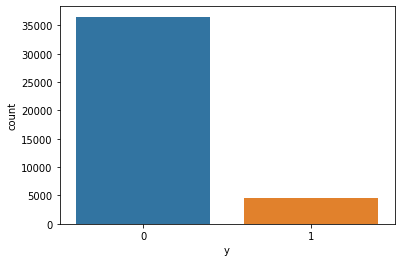

In [70]:
sns.countplot(y['y'])

# Splitting the dataset

In [71]:
# split into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, y, test_size = 0.2, random_state = 100)


In [72]:
X_train.shape

(32940, 11)

# SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 100)
X, Y = smote.fit_resample(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

# After Applying **SMOTE**

In [74]:
x_train = pd.DataFrame(X)
y_train = pd.DataFrame(Y)

In [75]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [76]:
finalD=pd.DataFrame(X)
finalD['y']=Y

In [77]:
finalD['y'].value_counts()

1    29236
0    29236
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


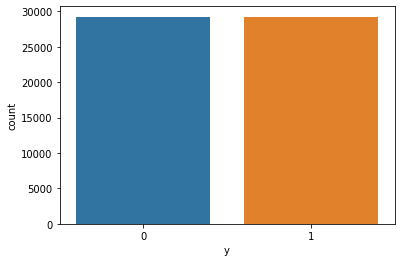

In [78]:
sns.countplot(finalD['y'])

In [79]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.594552,-3.957399,-1.063896,1.844544,-0.111712,1.010805,-0.584007,0.846381,-0.726622,-1.185873,-0.419627
1,-3.269533,-4.232320,1.263808,-1.135029,-0.167161,0.113674,-0.351337,-0.952288,-1.321677,0.777587,1.586500
2,-0.889397,1.787723,-0.208235,-0.295259,2.044301,-0.429191,-0.410430,-0.980170,0.865101,-0.327962,-0.271576
3,-1.056797,-2.201944,-4.620564,0.561128,-0.996786,-0.353263,0.779720,0.287059,-0.953788,0.068480,-0.393110
4,5.374148,-0.384545,-0.242700,-2.038987,-1.954510,0.034587,0.579717,0.604676,-0.825240,-0.516815,-0.373755


In [ ]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


# Fitiing SVM 

c=1, gamma= 0.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7325
1     910
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.17717061323618702

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.4209163969676009

In [ ]:
print(classifier.score(X_test ,Y_test))

0.822829386763813


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7300
           1       0.21      0.21      0.21       935

    accuracy                           0.82      8235
   macro avg       0.56      0.55      0.55      8235
weighted avg       0.82      0.82      0.82      8235



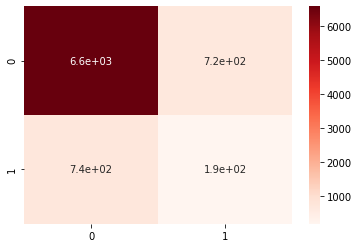

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


c=1, gamma= 1

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 1)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7642
1     593
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.16393442622950818

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.40488816508945796

In [ ]:
print(classifier.score(X_test ,Y_test))

0.8360655737704918


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7300
           1       0.15      0.10      0.12       935

    accuracy                           0.84      8235
   macro avg       0.52      0.51      0.51      8235
weighted avg       0.81      0.84      0.82      8235



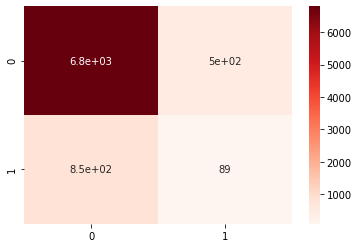

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


c=1, gamma= 1.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 1.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7742
1     493
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.15737704918032788

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.39670776294437177

In [ ]:
print(classifier.score(X_test ,Y_test))

0.8426229508196721


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7300
           1       0.13      0.07      0.09       935

    accuracy                           0.84      8235
   macro avg       0.51      0.51      0.50      8235
weighted avg       0.80      0.84      0.82      8235



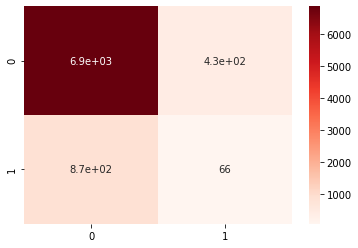

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


c=10 ,gammma=0.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 10, gamma = 0.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7452
1     783
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.17049180327868851

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.4129065309227846

In [ ]:
print(classifier.score(X_test ,Y_test))

0.8295081967213115


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7300
           1       0.20      0.17      0.18       935

    accuracy                           0.83      8235
   macro avg       0.55      0.54      0.54      8235
weighted avg       0.82      0.83      0.82      8235



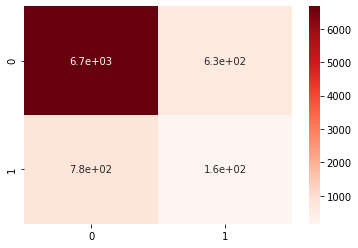

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


C=10, gamma=1

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 10, gamma = 1)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7693
1     542
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.1604128718882817

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.4005157573532928

In [ ]:
print(classifier.score(X_test ,Y_test))

0.8395871281117183


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7300
           1       0.14      0.08      0.11       935

    accuracy                           0.84      8235
   macro avg       0.52      0.51      0.51      8235
weighted avg       0.80      0.84      0.82      8235



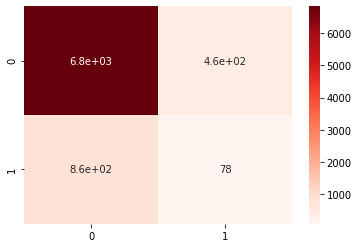

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


In [ ]:
c-10, gamma=1.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 10, gamma = 1.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7787
1     448
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.15288403157255617

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.3910038766720302

In [ ]:
print(classifier.score(X_test ,Y_test))

0.8471159684274439


In [ ]:
print(confusion_matrix(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

[[7149  216]
 [ 812   61]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7365
           1       0.22      0.07      0.11       873

    accuracy                           0.88      8238
   macro avg       0.56      0.52      0.52      8238
weighted avg       0.83      0.88      0.85      8238



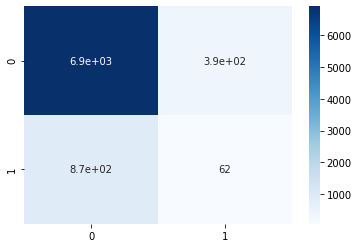

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()


C = 10, gamma = 2

In [80]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 10, gamma = 2)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [82]:
Y_pred = classifier.predict(X_test)

In [83]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [84]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7836
1     399
dtype: int64

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.14863387978142076

In [86]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.3855306470067208

In [87]:
print(classifier.score(X_test ,Y_test))

0.8513661202185793


In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7300
           1       0.14      0.06      0.08       935

    accuracy                           0.85      8235
   macro avg       0.51      0.51      0.50      8235
weighted avg       0.80      0.85      0.82      8235



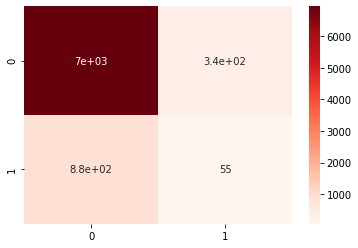

In [89]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


In [90]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 10, gamma = 2.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
x_train.columns

RangeIndex(start=0, stop=11, step=1)

In [92]:
Y_pred = classifier.predict(X_test)

In [93]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [94]:
y=pd.DataFrame(Y_pred)
y.value_counts()

0    7870
1     365
dtype: int64

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.14571948998178508

In [96]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.3817322228759122

In [97]:
print(classifier.score(X_test ,Y_test))

0.8542805100182149


In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7300
           1       0.14      0.05      0.08       935

    accuracy                           0.85      8235
   macro avg       0.51      0.51      0.50      8235
weighted avg       0.80      0.85      0.83      8235



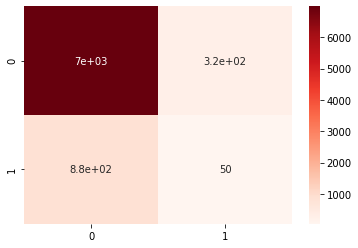

In [99]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


 C = 100, gamma = 0.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 100, gamma = 0.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.17328476017000607

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.4162748613236284

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7300
           1       0.17      0.14      0.15       935

    accuracy                           0.83      8235
   macro avg       0.53      0.53      0.53      8235
weighted avg       0.81      0.83      0.82      8235



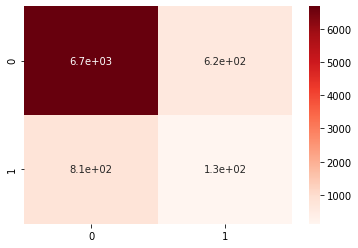

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


C = 100, gamma = 1.5

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 100, gamma = 1.5)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.1540983606557377

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.3925536404820846

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7300
           1       0.14      0.07      0.09       935

    accuracy                           0.85      8235
   macro avg       0.51      0.51      0.50      8235
weighted avg       0.80      0.85      0.82      8235



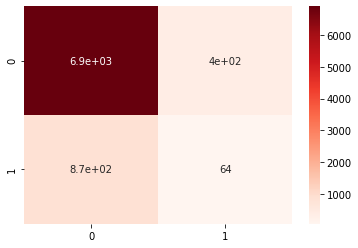

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()


 C = 100, gamma = 1

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 100, gamma = 1)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.16357012750455374

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, Y_pred))
rmsq

0.40443803914141624

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7300
           1       0.14      0.09      0.11       935

    accuracy                           0.84      8235
   macro avg       0.51      0.51      0.51      8235
weighted avg       0.80      0.84      0.82      8235



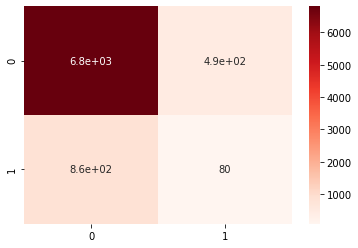

In [ ]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Reds, annot=True)
plt.show()
